In [1]:

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import re
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
    
except Exception:
  pass
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from IPython.display import clear_output
import time

/home/devesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/devesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/devesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/devesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

1.14.0


In [20]:
''' 

                                 ##### Make_Dataset #####

@args : None
@Returns (Features and Labels) of dimensions specified in next cell

Features : X Y Z axis concatenated together

Labels : Speed of each sample

Inputs : 1) Frame Size : size of the sliding window
         2) Overlap Percentage : percentage of overlap desired in each sliding frame
        
In function variables : 1) instances : Total no of frames that can be achieved
                        2) start_index : defines start of each sliding frame
                        3) end_index : defines end of each sliding frame
                        
Calculation :   1) instances = (Total Length(1535) - Frame_Length) / (Frame_Length(1 - Overlap_percent))
                
                2) For each Frame,
                   start_index = end_index - (Frame_size*overlap_percent)
                   end_index = start_index + Frame_size
                
                   Feature = X + Y + Z

'''

def Make_Dataset(Frame_size, overlap_percent):
    Features = list()
    Labels = list()
    
    
    
    instances = int(math.floor((1535 - Frame_size) / Frame_size*(1 - overlap_percent/100)))
    
    PATH = 'Cardio_Data/Cleaned_data'
    profiles = os.listdir(PATH)

    for profile in profiles:
        speeds = os.listdir(PATH + '/' + profile)
        speeds = [s for s in speeds if float(s[:-4])<7.1]
        #print(speeds)

        for speed in speeds:    
            
            #Read the csv file using pandas
            df = pd.read_csv(PATH + '/' + profile + '/' + speed)
            
            #Get label for this speed
            Label = float(re.sub('\.csv$', '', speed))
            
            
            start_index = 0 
            end_index = Frame_size
            
            for i in range(instances):
        
                feat_x = np.array(df.Accel_LN_X_CAL[start_index:end_index])
                feat_y = np.array(df.Accel_LN_Y_CAL[start_index:end_index])
                feat_z = np.array(df.Accel_LN_Z_CAL[start_index:end_index])
                
                start_index = end_index - int(Frame_size*overlap_percent/100)
                end_index = start_index + Frame_size
                # Build array of features
                feat_x = feat_x.reshape((len(feat_x),1))
                feat_y = feat_y.reshape((len(feat_y),1))
                feat_z = feat_z.reshape((len(feat_z),1))

                Feature = np.hstack((feat_x,feat_y,feat_z))
                
                Features.append((Feature))
                Labels.append(Label)
                
    return Features, Labels


'''
Train_Test_split for the data , 
default, test_size = 0.2

'''
def Split_Data(Features, Labels):
    
    #Train Test Split on data
    Features_Train, Features_Test, Labels_Train, Labels_Test = train_test_split(Features, Labels, shuffle = True, random_state = 42, test_size = 0.2)
    return(Features_Train, Features_Test, Labels_Train, Labels_Test)

Frame_size = int(input(" Enter the Frame Size for the dataset, range(50, 1500) : "))
overlap_percent = float(input("Enter the percentage of overlap desired for the dataset range(0,100): "))

Features = np.array(Features)
Features, Labels = Make_Dataset(Frame_size,overlap_percent)
Features_Train, Features_Test, Labels_Train, Labels_Test = Split_Data(Features, Labels)



 Enter the Frame Size for the dataset, range(50, 1500) : 150
Enter the percentage of overlap desired for the dataset range(0,100): 50


(4775, 30, 3)

In [92]:
Features1 = np.array(Features)
Features1 = Features1.reshape(764,150,3)
print(Features[0])
print(Features1[0])

[[  6.71084337   5.45783133   3.24096386   1.15662651   0.25301205
   -0.54216867  -0.51807229  -1.54216867  -0.55421687   0.44578313
   -0.25301205  -3.31325301  -4.89156627  -4.85542169  -3.81927711
   -3.28915663  -2.19277108  -2.53012048  -2.57831325  -2.53012048
   -3.13253012  -5.20481928  -6.36144578  -7.15662651  -7.40963855
   -6.8313253   -7.03614458  -7.69879518  -9.92771084 -11.44578313
   -8.13253012  -4.02409639  -1.20481928  -0.77108434  -0.04819277
    0.74698795   1.3253012    1.61445783   1.43373494   0.59036145
    0.45783133  -0.51807229  -1.04819277  -1.69879518  -1.90361446
   -1.80722892  -1.20481928   0.46987952   5.28915663  10.4939759
   10.91566265   6.73493976   3.13253012  -0.20481928  -1.24096386
   -2.77108434  -3.31325301  -3.04819277  -2.62650602  -2.19277108
   -1.           1.40963855   3.38554217   3.39759036   2.89156627
    1.80722892   0.91566265  -0.87951807  -2.26506024  -2.87951807
   -3.78313253  -6.          -9.56626506 -14.22891566 -16.37349

In [22]:
'''
Reshape The Train, Test data!

Train Data dimensions - (len(Train_data), 1)
Test Data dimensions - (len(Test_data), 1)

'''

Labels_Train = np.array(Labels_Train).reshape(len(Labels_Train),1)
print('Train Labels shape   : {}'.format(Labels_Train.shape))
Features_Train = np.array(Features_Train)
print('Train Features shape : {}'.format(Features_Train.shape))

Labels_Test = np.array(Labels_Test).reshape(len(Labels_Test),1)
print('Test labels shape    : {}'.format(Labels_Test.shape))
Features_Test = np.array(Features_Test)
print('Test Features shape  : {}'.format(Features_Test.shape))
print(Features_Train[0])
print(Features_Train[1])


Train Labels shape   : (611, 1)
Train Features shape : (611, 150, 3)
Test labels shape    : (153, 1)
Test Features shape  : (153, 150, 3)
[[ 7.11956522 11.02173913  3.01086957]
 [ 7.10869565 11.25        3.52173913]
 [ 7.01086957 11.29347826  3.70652174]
 [ 7.0326087  11.79347826  3.43478261]
 [ 6.52173913 12.5326087   2.72826087]
 [ 5.91304348 14.59782609  2.31521739]
 [ 6.06521739 17.64130435  3.10869565]
 [ 5.89130435 18.07608696  3.5326087 ]
 [ 4.82608696 15.35869565  2.10869565]
 [ 4.42391304 14.39130435  0.66304348]
 [ 4.80434783 16.51086957  0.64130435]
 [ 4.94565217 17.90217391  0.83695652]
 [ 4.69565217 17.89130435  1.02173913]
 [ 4.45652174 16.69565217  1.43478261]
 [ 4.45652174 15.06521739  2.02173913]
 [ 3.94565217 13.36956522  2.42391304]
 [ 3.35869565 12.10869565  2.36956522]
 [ 2.72826087 11.52173913  2.01086957]
 [ 2.36956522 11.33695652  1.38043478]
 [ 2.11956522 11.01086957  0.90217391]
 [ 2.0326087  10.88043478  0.51086957]
 [ 2.06521739 10.88043478  0.22826087]
 [ 2

In [46]:
'''

Normalize Features and Labels

'''

def norm(x, train_mean,train_std):
  return (x - train_mean) / train_std

train_mean = np.mean(Features_Train.flatten())
train_std = np.std(Features_Train.flatten())
Features_Train = norm(Features_Train,train_mean, train_std)
Features_Test = norm(Features_Test,train_mean, train_std)

Features_Train[0]

array([[ 0.2352461 ,  0.73385021, -0.28974652],
       [ 0.23385723,  0.76301646, -0.22446966],
       [ 0.22135741,  0.76857194, -0.20085888],
       [ 0.22413515,  0.83245993, -0.23558062],
       [ 0.15885829,  0.92690305, -0.32585713],
       [ 0.0810816 ,  1.19078823, -0.37863416],
       [ 0.10052577,  1.57967165, -0.2772467 ],
       [ 0.07830386,  1.63522643, -0.22308079],
       [-0.05780534,  1.28800908, -0.40502268],
       [-0.1091935 ,  1.16439971, -0.58974231],
       [-0.06058308,  1.43522924, -0.59252004],
       [-0.04252777,  1.61300452, -0.5675204 ],
       [-0.07447177,  1.61161565, -0.54390962],
       [-0.1050269 ,  1.45884002, -0.49113258],
       [-0.1050269 ,  1.25050961, -0.41613363],
       [-0.17030376,  1.03384599, -0.36474547],
       [-0.2453027 ,  0.87273714, -0.37168981],
       [-0.32585713,  0.7977382 , -0.4175225 ],
       [-0.37168981,  0.77412742, -0.49807693],
       [-0.40363381,  0.73246134, -0.55918718],
       [-0.41474476,  0.7157949 , -0.609

In [130]:
np.array(Features).shape

(764, 150, 3)

In [120]:
# from tensorflow.keras.layers import Conv1D,MaxPooling1D,MaxPooling2D, Flatten, Dense, Conv2D
# def build_cnn_model():
#     model = keras.Sequential([
        
#         #Conv2D(filters = 6, kernel_size = 3, padding='same', activation='relu', input_shape=(Frame_size,3,1)),
#             Conv2D(filters = 9,kernel_size = 10 ,padding='same', activation='relu', input_shape=( 1,Frame_size,3)),
#             #Flatten(), 
#             MaxPooling1D(),
#         Conv2D(filters = 18,kernel_size = 3 ,padding='same', activation='relu', input_shape=( Frame_size,3)),
#         MaxPooling2D(),
# Conv2D(filters = 27,kernel_size = 3 ,padding='same', activation='relu', input_shape=( Frame_size,3)),
#         MaxPooling2D(),
#         layers.Dense(300, activation='relu' ),

#     Dense(150, activation='relu'),

#     Dense(50, activation='relu'),
        
# Dense(30, activation='relu'),
#        Flatten(),
#     Dense(1)
#     ])
#     optimizer = tf.keras.optimizers.RMSprop(0.001)

#     model.compile(optimizer=optimizer,
#               loss='mean_absolute_error',
#               metrics=['mae','mse'])
#     return model
    
# #build_cnn_model()


In [140]:
def build_cnn_model():
    model = keras.Sequential([
        
    Conv2D(filters = 9,kernel_size = 3,padding='same', activation='relu', input_shape=(1,Frame_size,3)),
            
       Flatten(),
    Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(optimizer=optimizer,
              loss='mean_absolute_error',
              metrics=['mae','mse'])
    return model
    
#build_cnn_model()


In [141]:
model = build_cnn_model()
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 1, 150, 9)         252       
_________________________________________________________________
flatten_38 (Flatten)         (None, 1350)              0         
_________________________________________________________________
dense_160 (Dense)            (None, 1)                 1351      
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________


In [142]:
EPOCHS = 1000
history = model.fit(
  Features_Train, Labels_Train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


example_batch = Features_Train[:10]
example_result = model.predict(example_batch)
print()
print(np.hstack((example_result , Labels_Train[:10])))

ValueError: Error when checking input: expected conv2d_34_input to have 4 dimensions, but got array with shape (611, 150, 3)

In [143]:
loss, mae, mse = model.evaluate(Features_Test, Labels_Test, verbose=2)


ValueError: Error when checking input: expected conv2d_34_input to have 4 dimensions, but got array with shape (153, 150, 3)


Epoch: 0, loss:1.7399,  mean_absolute_error:1.7399,  mean_squared_error:5.5422,  val_loss:0.8804,  val_mean_absolute_error:0.8804,  val_mean_squared_error:1.3028,  
....................................................................................................
Epoch: 100, loss:0.3254,  mean_absolute_error:0.3254,  mean_squared_error:0.1686,  val_loss:0.5707,  val_mean_absolute_error:0.5707,  val_mean_squared_error:0.5142,  
....................................................................................................
Epoch: 200, loss:0.2698,  mean_absolute_error:0.2698,  mean_squared_error:0.1086,  val_loss:0.4400,  val_mean_absolute_error:0.4400,  val_mean_squared_error:0.3224,  
...................................................

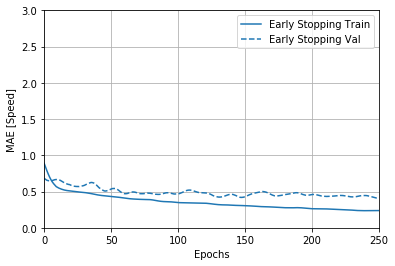

153/153 - 0s - loss: 0.3786 - mean_absolute_error: 0.3786 - mean_squared_error: 0.2164
Testing set Mean Abs Error:  0.38 mph


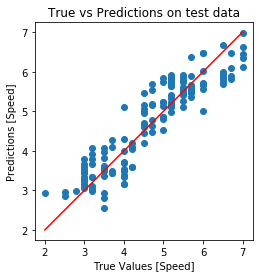

In [90]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

EPOCHS = 2000

model = build_cnn_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

early_history = model.fit(Features_Train, Labels_Train, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])




plotter.plot({'Early Stopping': early_history}, metric = "mean_absolute_error")
plt.ylim([0, 3])
plt.ylabel('MAE [Speed]')
plt.show()

%matplotlib inline




loss, mae, mse = model.evaluate(Features_Test, Labels_Test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} mph".format(mae))




test_predictions = model.predict(Features_Test)#.flatten()

a = plt.axes(aspect='equal')
plt.scatter(Labels_Test, test_predictions,)
plt.xlabel('True Values [Speed]')
plt.ylabel('Predictions [Speed]')
lims = [2, 7]
#plt.xlim(lims)
#plt.ylim(lims)
#plt.xticks(np.linspace(2,7,11),rotation = 'vertical')
#plt.yticks(np.linspace(2,7,11))


_ = plt.plot(lims, lims, color= 'red')
plt.title('True vs Predictions on test data')
#plt.savefig('predictions.jpg')
plt.show()
%matplotlib inline